<a href="https://colab.research.google.com/github/PedroBVidal/Dog_rec/blob/main/Dog_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install split-folders

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.models import load_model
#import splitfolders

print(tf.__version__)


2.6.0


In [ ]:
IMAGE_SIZE = [224,224]

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False

    x = Flatten()(inception.output)

    prediction = Dense(100, activation='softmax')(x)

    # create a model object
    model = Model(inputs=inception.input, outputs=prediction)

    #input_folder = '/content/drive/MyDrive/UFPR/IC/dataset_test_google_colab/dogs/train'

    #splitfolders.ratio(input_folder, output="/content/drive/MyDrive/UFPR/IC/dataset_test_google_colab/dogs/splited_data", 
     #              seed=42, ratio=(.7, .2, .1), 
      #             group_prefix=None) 

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1/255.0, 
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
    )

valid_datagen = ImageDataGenerator(
    rescale = 1./255,
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
train_data_generator = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/UFPR/IC/dataset_test_google_colab/dogs/splited_data/train',
    target_size = (224, 224),
    class_mode = 'categorical',
    batch_size = 16
    )
#train_data_generator.class_indices


Found 12097 images belonging to 100 classes.


In [ ]:
validation_data_generator = valid_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/UFPR/IC/dataset_test_google_colab/dogs/splited_data/val',
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 16
    )


Found 3425 images belonging to 100 classes.


In [ ]:
model.summary()

Model: "model_310"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
__________________________________________________________________________________________

In [ ]:
model.compile(
    optimizer= 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'] 
) 

print(len(validation_data_generator))  

215


In [ ]:
history = model.fit_generator(
    generator=train_data_generator,
    steps_per_epoch= len(train_data_generator),
    epochs= 10,
    validation_data = validation_data_generator,
    validation_steps = len(validation_data_generator)
    )


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
757/757 [==============================] - 4105s 5s/step - loss: 15.9870 - accuracy: 0.6249 - val_loss: 16.4310 - val_accuracy: 0.7063
Epoch 2/10
757/757 [==============================] - 1766s 2s/step - loss: 11.9086 - accuracy: 0.7591 - val_loss: 17.7236 - val_accuracy: 0.7185
Epoch 3/10
757/757 [==============================] - 1776s 2s/step - loss: 10.1046 - accuracy: 0.8021 - val_loss: 18.9525 - val_accuracy: 0.7404
Epoch 4/10
757/757 [==============================] - 1783s 2s/step - loss: 8.2270 - accuracy: 0.8352 - val_loss: 19.6212 - val_accuracy: 0.7401
Epoch 5/10
757/757 [==============================] - 1783s 2s/step - loss: 7.8966 - accuracy: 0.8473 - val_loss: 21.4515 - val_accuracy: 0.7460
Epoch 6/10
757/757 [==============================] - 1798s 2s/step - loss: 6.5840 - accuracy: 0.8705 - val_loss: 25.0961 - val_accuracy: 0.7404
Epoch 7/10
757/757 [==============================] - 1799s 2s/step - loss: 6.6686 - accuracy: 0.8753 - val_loss: 26.5264 - val

In [ ]:
model.save('/content/drive/MyDrive/UFPR/IC/dataset_test_google_colab/dogs/model_inception10epc.h5')
import pickle 

pickle_out = open("dog_rec_history.pickle","wb")
pickle.dump(history.history, pickle_out)
pickle_out.close()

In [ ]:
import pickle 

pickle_out = open("/content/drive/MyDrive/UFPR/IC/dataset_test_google_colab/dogs/dog_rec_history.pickle","wb")
pickle.dump(history.history, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("/content/drive/MyDrive/UFPR/IC/dataset_test_google_colab/dogs/dog_rec_history.pickle","rb")
saved_history = pickle.load(pickle_in)
print(saved_history)

{'loss': [15.986966133117676, 11.908589363098145, 10.104555130004883, 8.227048873901367, 7.8965864181518555, 6.584011554718018, 6.6685967445373535, 6.123434543609619, 5.784842014312744, 5.470805644989014], 'accuracy': [0.6249483227729797, 0.7591138482093811, 0.8020997047424316, 0.8352484107017517, 0.8473175168037415, 0.8704637289047241, 0.8752583265304565, 0.883938193321228, 0.8928660154342651, 0.8979085683822632], 'val_loss': [16.431032180786133, 17.723644256591797, 18.95250129699707, 19.621166229248047, 21.451494216918945, 25.09609031677246, 26.52640724182129, 26.1883602142334, 27.341577529907227, 28.09068489074707], 'val_accuracy': [0.7062773704528809, 0.7185401320457458, 0.7404379844665527, 0.7401459813117981, 0.7459853887557983, 0.7404379844665527, 0.7322627902030945, 0.7389780879020691, 0.7527007460594177, 0.7494890689849854]}


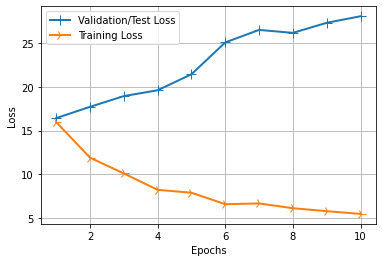

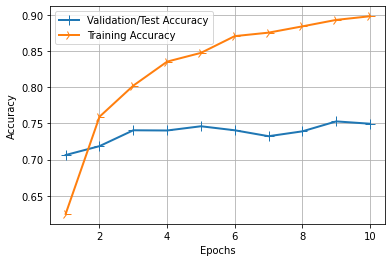

In [ ]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:

classifier = load_model('/content/drive/MyDrive/UFPR/IC/dataset_test_google_colab/dogs/model_inception10epc.h5')

Found 1823 images belonging to 100 classes.
{'n02085620-Chihuahua': 0, 'n02085782-Japanese_spaniel': 1, 'n02085936-Maltese_dog': 2, 'n02086079-Pekinese': 3, 'n02086240-Shih-Tzu': 4, 'n02086646-Blenheim_spaniel': 5, 'n02086910-papillon': 6, 'n02087046-toy_terrier': 7, 'n02088094-Afghan_hound': 8, 'n02088238-basset': 9, 'n02088364-beagle': 10, 'n02088466-bloodhound': 11, 'n02088632-bluetick': 12, 'n02089078-black-and-tan_coonhound': 13, 'n02089867-Walker_hound': 14, 'n02089973-English_foxhound': 15, 'n02090622-borzoi': 16, 'n02090721-Irish_wolfhound': 17, 'n02091032-Italian_greyhound': 18, 'n02091134-whippet': 19, 'n02091244-Ibizan_hound': 20, 'n02091467-Norwegian_elkhound': 21, 'n02091635-otterhound': 22, 'n02091831-Saluki': 23, 'n02092339-Weimaraner': 24, 'n02093256-Staffordshire_bullterrier': 25, 'n02093428-American_Staffordshire_terrier': 26, 'n02093647-Bedlington_terrier': 27, 'n02093754-Border_terrier': 28, 'n02093991-Irish_terrier': 29, 'n02094114-Norfolk_terrier': 30, 'n02094433-

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[14  0  0 ...  0  0  0]
 [ 0 19  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0 16  0]
 [ 0  0  0 ...  0  2 13]]
Classification Report
                                          precision    recall  f1-score   support

                     n02085620-Chihuahua       0.74      0.82      0.78        17
              n02085782-Japanese_spaniel       0.86      0.95      0.90        20
                   n02085936-Maltese_dog       0.75      0.81      0.78        26
                      n02086079-Pekinese       0.79      0.69      0.73        16
                      n02086240-Shih-Tzu       0.61      0.50      0.55        22
              n02086646-Blenheim_spaniel       0.94      0.84      0.89        19
                      n02086910-papillon       0.77      0.81      0.79        21
                   n02087046-toy_terrier       0.59      0.72      0.65        18
                  n02088094-Afghan_hound       0.86      0.96     

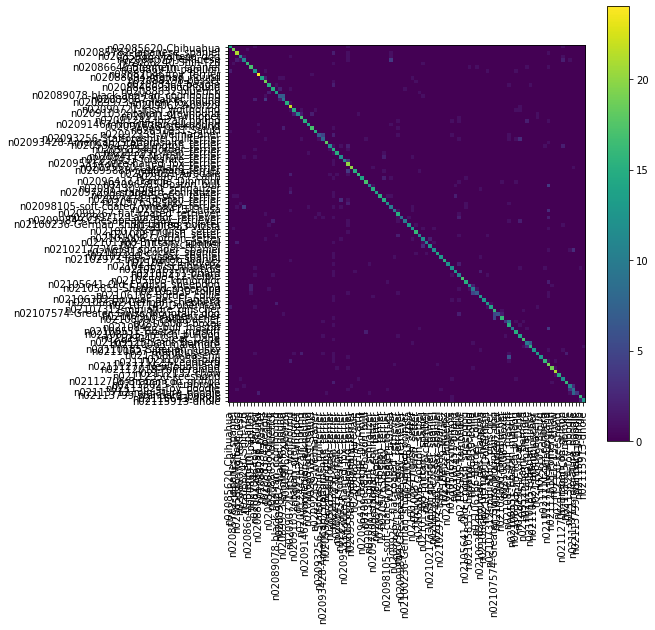

In [ ]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix

test_data_generator = test_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/UFPR/IC/dataset_test_google_colab/dogs/splited_data/test',
    target_size = (224,224),
    )

class_labels = test_data_generator.class_indices
print(class_labels)
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

test_generator = test_datagen.flow_from_directory(
        directory='/content/drive/MyDrive/UFPR/IC/dataset_test_google_colab/dogs/splited_data/test',
        target_size=(224, 224),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)


nb_train_samples = 12097
nb_validation_samples = 1823
batch_size = 16;

#Confution Matrix and Classification Report
Y_pred = classifier.predict_generator(test_generator, steps=1823)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(test_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

nb_train_samples = 19548
nb_validation_samples = 990